## EDA (Exploratory Data Analisis)
        * En este notebook se realiza un analisis de nuestros datasets para encontrar insights y posibles outliers que lleguen a afectar nuestros datos, entendiendo tendencias y resultados obtenidos
    

In [1]:
# Cargamos las librerias que utilizaremos para nuestro analisis 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
import pyarrow

In [2]:
# Cargamos nustros datasets 
games= pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy_Henry_Modulos/PI_ML/PI_ML_OPS_STEAM/PI_ML_OPS_STEAM/Datasets/steam_games.parquet')
reviews= pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy_Henry_Modulos/PI_ML/PI_ML_OPS_STEAM/PI_ML_OPS_STEAM/Datasets/user_reviews.parquet')
items= pd.read_parquet('C:/Users/hp/Desktop/HENRY/Soy_Henry_Modulos/PI_ML/PI_ML_OPS_STEAM/PI_ML_OPS_STEAM/Datasets/users_items.parquet')

In [3]:
# revisamos que el dataframe games se haya cargado correctamente 
games

,genres,app_name,title,url,release_date,tags,reviews_url,id
0,None,None,None,None,NaT,None,None,NaN
1,None,None,None,None,NaT,None,None,NaN
2,None,None,None,None,NaT,None,None,NaN
3,None,None,None,None,NaT,None,None,NaN
4,None,None,None,None,NaT,None,None,NaN
...,...,...,...,...,...,...,...,...
120440,"['Casual', 'Indie', 'Simulation', 'Strategy']",None,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"['Strategy', 'Indie', 'Casual', 'Simulation']",http://steamcommunity.com/app/773640/reviews/?...,773640.0
120441,"['Casual', 'Indie', 'Strategy']",None,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"['Strategy', 'Indie', 'Casual']",http://steamcommunity.com/app/733530/reviews/?...,733530.0
120442,"['Indie', 'Racing', 'Simulation']",None,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"['Indie', 'Simulation', 'Racing']",http://steamcommunity.com/app/610660/reviews/?...,610660.0
120443,"['Casual', 'Indie']",None,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"['Indie', 'Casual', 'Puzzle', 'Singleplayer', ...",http://steamcommunity.com/app/658870/reviews/?...,658870.0


In [4]:
# revisamos que el dataframe reviews se haya cargado correctamente 
reviews

,user_id,user_url,posted,item_id,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-04-21,43110,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,2013-09-08,227300,True,For a simple (it's actually not all that simpl...,2
...,...,...,...,...,...,...,...
59300,Fuckfhaisjnsnsjakaka,http://steamcommunity.com/id/Fuckfhaisjnsnsjakaka,NaT,70,True,a must have classic from steam definitely wort...,2
59301,3214213216,http://steamcommunity.com/id/3214213216,NaT,362890,True,this game is a perfect remake of the original ...,2
59302,ChrisCoroner,http://steamcommunity.com/id/ChrisCoroner,NaT,273110,True,had so much fun plaing this and collecting res...,2
59303,CaptainAmericaCw,http://steamcommunity.com/id/CaptainAmericaCw,NaT,730,True,:D,2


In [5]:
# revisamos que el dataframe items se haya cargado correctamente  
items

,user_id,item_id,item_name,playtime_forever
0,76561197970982479,10,Counter-Strike,6.0
1,76561197970982479,20,Team Fortress Classic,0.0
2,76561197970982479,30,Day of Defeat,7.0
3,76561197970982479,40,Deathmatch Classic,0.0
4,76561197970982479,50,Half-Life: Opposing Force,0.0
...,...,...,...,...
5170009,76561198329548331,346330,BrainBread 2,0.0
5170010,76561198329548331,373330,All Is Dust,0.0
5170011,76561198329548331,388490,One Way To Die: Steam Edition,3.0
5170012,76561198329548331,521570,You Have 10 Seconds 2,4.0


In [6]:
games.dtypes

genres                  object
app_name                object
title                   object
url                     object
release_date    datetime64[ns]
tags                    object
reviews_url             object
id                     float64
dtype: object

In [7]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        28852 non-null  object        
 1   app_name      0 non-null      object        
 2   title         30085 non-null  object        
 3   url           32135 non-null  object        
 4   release_date  29783 non-null  datetime64[ns]
 5   tags          31972 non-null  object        
 6   reviews_url   32133 non-null  object        
 7   id            32133 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 7.4+ MB


In [8]:
# encontramos que la columna'app_name' no contiene ningun dato que pueda aportar valor al EDA 
games['app_name'].value_counts()
# eliminamos la columna 'app_name'
games.drop('app_name',axis=1, inplace=True)

In [9]:
# contamos los datos duplicados 
games.duplicated().sum()

88309

In [10]:
# eliminamos los datos duplicados 
games.drop_duplicates(inplace=True)

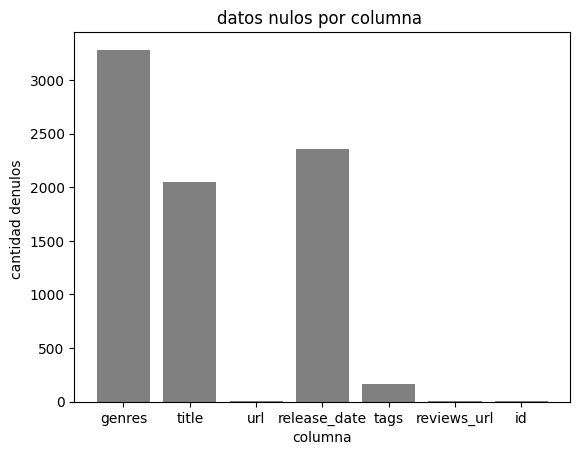

In [11]:
# Calcular la cantidad de valores nulos en cada columna
conteo_de_nulos = games.isnull().sum()

# Crear la gráfica de barras
plt.bar(conteo_de_nulos.index, conteo_de_nulos.values,color='grey')
plt.title('datos nulos por columna ')
plt.ylabel('cantidad denulos ')
plt.xlabel('columna') 
# Mostrar la gráfica
plt.show()

In [12]:
games.isnull().sum()

genres          3284
title           2051
url                1
release_date    2353
tags             164
reviews_url        3
id                 3
dtype: int64

In [13]:
# elimiamos los datos nulos ya que la proporcion a los datos totales por columna abarca mas del 75% 
games.dropna(inplace=True)
games.reset_index(drop=True, inplace=True)

In [14]:
# encontramos que la columna id es tipo float y lo necesitamos int 
# cambiamos el tipo de dato de la columna id 
games['id']= games['id'].astype(int)

In [15]:
games.describe()

,release_date,id
count,28523,2.852300e+04
mean,2015-05-27 07:22:24.304596224,4.401102e+05
min,1983-06-19 00:00:00,1.000000e+01
25%,2014-10-27 00:00:00,3.175055e+05
50%,2016-04-25 00:00:00,4.343600e+05
75%,2017-04-19 00:00:00,5.852150e+05
max,2021-12-31 00:00:00,2.028850e+06
std,NaN,1.846429e+05


In [16]:
genre = pd.crosstab(games['genres'],columns='Count')
genre

col_0,Count
genres,
"['Accounting', 'Animation &amp; Modeling', 'Audio Production', 'Design &amp; Illustration', 'Education', 'Photo Editing', 'Software Training', 'Utilities', 'Video Production', 'Web Publishing']",1
"['Accounting', 'Utilities']",1
['Accounting'],3
"['Action', 'Adventure', 'Casual', 'Free to Play', 'Indie', 'Early Access']",2
"['Action', 'Adventure', 'Casual', 'Free to Play', 'Indie', 'Massively Multiplayer', 'RPG', 'Early Access']",1
...,...
"['Utilities', 'Video Production']",11
"['Utilities', 'Web Publishing']",1
['Utilities'],74


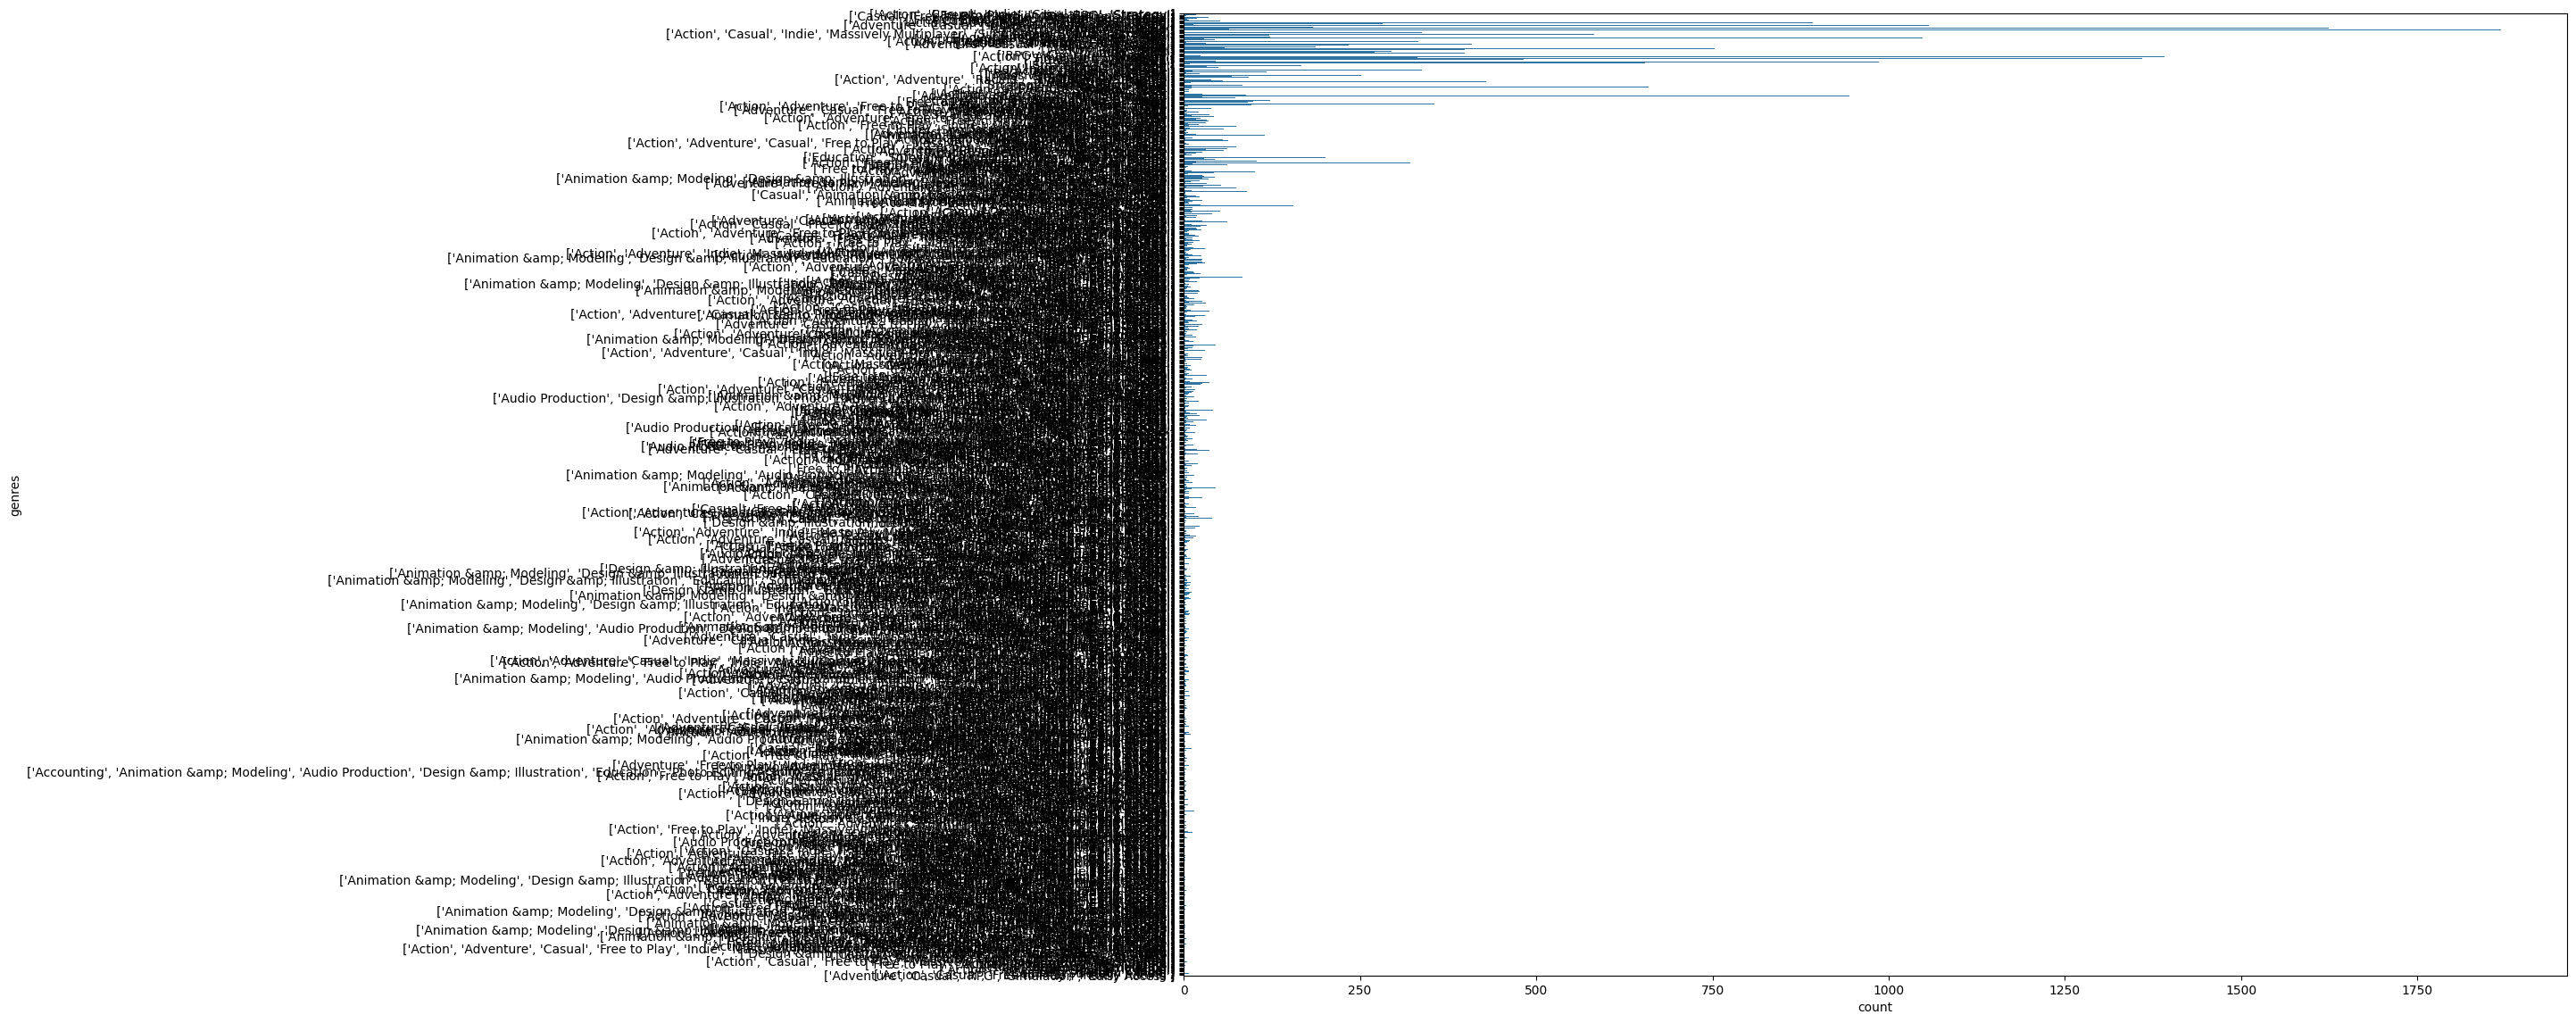

In [50]:
# Contabilizo los generos
cantidad_generos= games["genres"].value_counts().explode()

# Creo el gráfico de generos
plt.figure(figsize=(20,14))
sns.countplot(data=games, y='genres', orient='h')
plt.show()

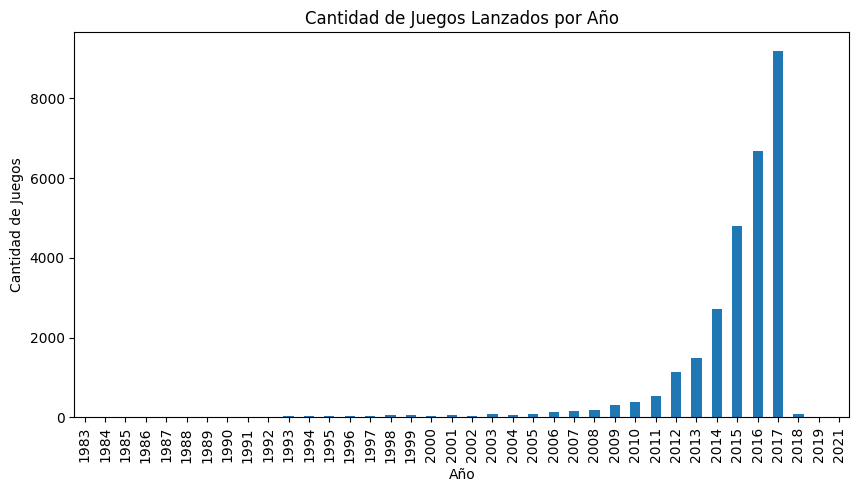

In [48]:
games['year'] = pd.to_datetime(games['release_date']).dt.year

# Calculamos la cantidad de productos lanzados por año
games_per_year = games.groupby('year')['id'].nunique()
# Graficamos
plt.figure(figsize=(10, 5))
games_per_year.plot(kind='bar')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos')
plt.show()

In [35]:
release = pd.crosstab(games['release_date'],columns='count')
release

col_0,count
release_date,
1983-06-19,1
1984-04-29,1
1984-11-01,1
1985-01-01,1
1986-05-01,1
...,...
2018-12-31,1
2019-05-01,1
2019-09-16,1


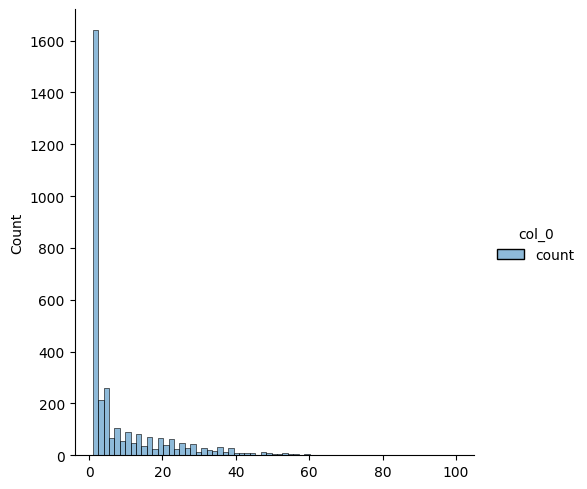

In [19]:
sns.displot(release)
plt.show()

In [23]:
# busamos correlacion entre las variables numericas 
games['release_date'].corr(games['id'])

0.6141603479485767

In [19]:
# verificamos valores faltantes
reviews.isnull().sum()
# solo se encontraron valores faltantes en la columna posted 

user_id                   0
user_url                  0
posted                10119
item_id                   0
recommend                 0
review                    0
sentiment_analysis        0
dtype: int64

In [20]:
#eliminamos los datos faltantes 
reviews.dropna(inplace=True)

In [21]:
#verificamos si existen datos duplicados 
reviews.duplicated().sum()

116

In [22]:
#eliminamos los datos duplicados 
reviews.drop_duplicates()

,user_id,user_url,posted,item_id,recommend,review,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,2
1,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-07-15,22200,True,It's unique and worth a playthrough.,2
2,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2011-04-21,43110,True,Great atmosphere. The gunplay can be a bit chu...,2
3,js41637,http://steamcommunity.com/id/js41637,2014-06-24,251610,True,I know what you think when you see this title ...,2
4,js41637,http://steamcommunity.com/id/js41637,2013-09-08,227300,True,For a simple (it's actually not all that simpl...,2
...,...,...,...,...,...,...,...
59252,llDracuwulf,http://steamcommunity.com/id/llDracuwulf,2015-10-14,730,True,its FUNNNNNNNN,1
59255,76561198223837952,http://steamcommunity.com/profiles/76561198223...,2015-10-10,253980,True,Awesome fantasy game if you don't mind the gra...,2
59265,76561198229845636,http://steamcommunity.com/profiles/76561198229...,2015-10-31,730,True,Prettyy Mad Game,0
59267,76561198232478272,http://steamcommunity.com/profiles/76561198232...,2015-12-14,730,True,AMAZING GAME 10/10,2


In [23]:
# se cuentan los valores de la columna recommend
reviews['recommend'].value_counts()

recommend
True     44182
False     5004
Name: count, dtype: int64

In [24]:
reviews.groupby(reviews['item_id']).count()



,user_id,user_url,posted,recommend,review,sentiment_analysis
item_id,,,,,,
10,51,51,51,51,51,51
20,15,15,15,15,15,15
30,4,4,4,4,4,4
40,1,1,1,1,1,1
50,4,4,4,4,4,4
...,...,...,...,...,...,...
421890,1,1,1,1,1,1
422400,1,1,1,1,1,1
423120,1,1,1,1,1,1


In [25]:
#revisamos el tipo de dato de cada columna en el DF reviews
reviews.dtypes

user_id                       object
user_url                      object
posted                datetime64[ns]
item_id                        int32
recommend                       bool
review                        object
sentiment_analysis             int64
dtype: object

In [26]:
# revisamos el nombre de las columnas del DF reviews
reviews.columns

Index(['user_id', 'user_url', 'posted', 'item_id', 'recommend', 'review',
       'sentiment_analysis'],
      dtype='object')

In [27]:
reviews.describe()

,posted,item_id,sentiment_analysis
count,49186,49186.000000,49186.000000
mean,2014-09-08 16:51:37.466758912,155534.957061,1.482088
min,2010-10-16 00:00:00,10.000000,0.000000
25%,2014-02-20 00:00:00,6900.000000,1.000000
50%,2014-09-11 00:00:00,209090.000000,2.000000
75%,2015-05-03 00:00:00,248515.000000,2.000000
max,2015-12-31 00:00:00,428880.000000,2.000000
std,NaN,124549.146739,0.749623


Palabra: game, Frecuencia: 33864
Palabra: play, Frecuencia: 7432
Palabra: fun, Frecuencia: 5213
Palabra: one, Frecuencia: 5134
Palabra: good, Frecuencia: 4065
Palabra: time, Frecuencia: 3812
Palabra: make, Frecuencia: 3542
Palabra: great, Frecuencia: 3337
Palabra: will, Frecuencia: 3306
Palabra: played, Frecuencia: 3268


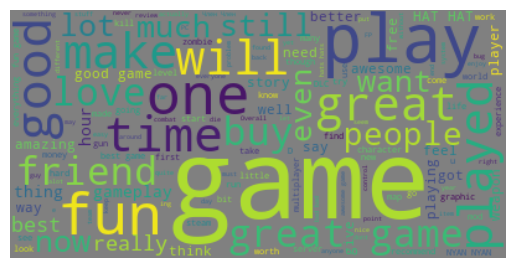

In [28]:
#hacemos que la columna review sea un texto para poder realizar la nube de palabras 
texto = ' '.join(reviews['review'])
# Crear la nube de palabras
wc = WordCloud(background_color='gray')
wc.generate(texto)

# Obtener las frecuencias de las palabras
frecuencias = wc.process_text(texto)

# Ordenar las palabras por frecuencia
palabras_ordenadas = sorted(frecuencias.items(), key=lambda x: x[1], reverse=True)

# Obtener las 10 palabras más frecuentes
top_10_palabras = palabras_ordenadas[:10]

# Imprimir las 10 palabras más frecuentes
for palabra, frecuencia in top_10_palabras:
    print(f'La palabra: {palabra}, aparece: {frecuencia}')

# Mostrar la nube de palabras
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

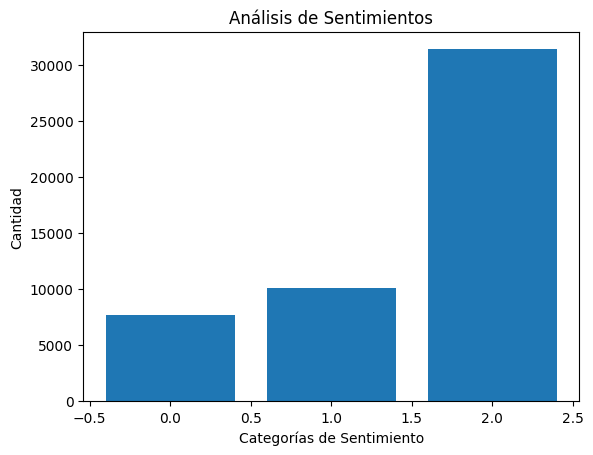

In [31]:
# Obtenemos el recuento de los reviews
conteo_categorias = reviews['sentiment_analysis'].value_counts()

# Crear el gráfico de barras para mostrar llos resultados 
plt.bar(conteo_categorias.index, conteo_categorias.values)
plt.title('Análisis de Sentimientos')
plt.xlabel('Categorías de Sentimiento')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

Encontramos que dentro de nuestro analisis de sentimientos 
* _31310_ reviews son positivas
* _10096_ son neutrales
* _7664_ son negativas  

*Buscamos correlaciones bivariables*

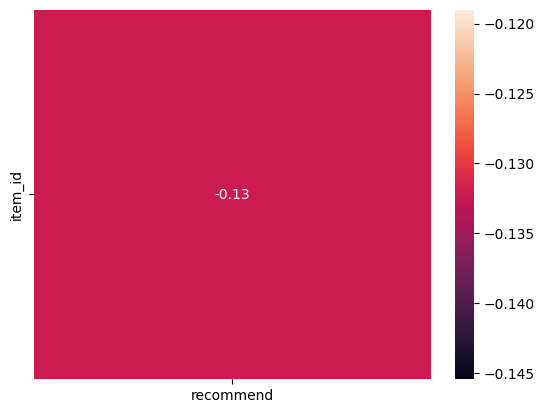

In [28]:
# Calcular la correlación
corr = reviews['item_id'].corr(reviews['recommend'])

# Crear un DataFrame con la correlación
df_corr = pd.DataFrame([[corr]], columns=['recommend'], index=['item_id'])

# Crear el heatmap
sns.heatmap(df_corr, annot=True)
plt.show()

In [33]:
items.dtypes

user_id              object
item_id               int32
item_name            object
playtime_forever    float64
dtype: object

In [34]:
items.columns

Index(['user_id', 'item_id', 'item_name', 'playtime_forever'], dtype='object')

In [35]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5153209 entries, 0 to 5170013
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   item_id           int32  
 2   item_name         object 
 3   playtime_forever  float64
dtypes: float64(1), int32(1), object(2)
memory usage: 176.9+ MB


In [32]:
# obtenemos las estadisticas descriptivas para la columna 'playtime_forever' 

print(f'minimo de tiempo jugado:', items['playtime_forever'].min(),'mins')
print(f'maximo de tiempo jugado:', items['playtime_forever'].max(),'mins')
print(f'promedio de timepo jugado:', items['playtime_forever'].mean().round(3),'mins')

print(f'la desviacion standar es:',items['playtime_forever'].std())
print(f'nuestros cuartiles son 1er:',items['playtime_forever'].quantile(.25),'tercer',items['playtime_forever'].quantile(.75))

minimo de tiempo jugado: 0.0 mins
maximo de tiempo jugado: 642773.0 mins
promedio de timepo jugado: 991.495 mins
la desviacion standar es: 5418.204404857233
nuestros cuartiles son 1er: 0.0 tercer 355.0


en la columna 'playtime_forever' encontramos que: 
* minimo de tiempo jugado: 0.0 mins
* maximo de tiempo jugado: 642773.0 mins
* promedio de timepo jugado: 991.495 mins
* la desviacion standar es: 5418.204404857233
* nuestros cuartiles son 1er: 0.0 tercer 355.0

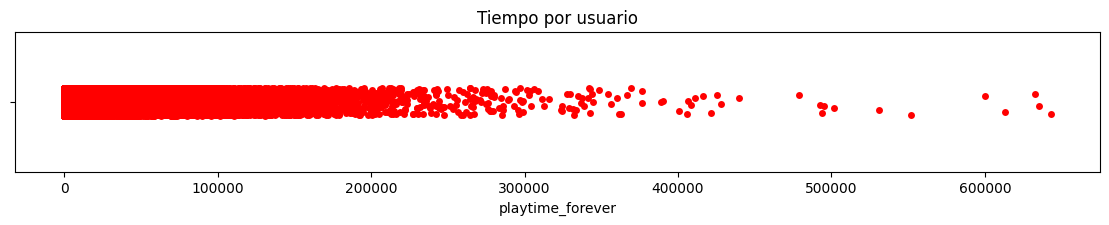

In [42]:
time_count = items.groupby('user_id')['playtime_forever'].unique().explode()
time_count= pd.DataFrame(time_count)
time_count_user = time_count.sort_values('playtime_forever', ascending=False)

fig = plt.figure(figsize=(14, 4))
ax1 = fig.add_subplot(211)
sns.stripplot(data=time_count_user, x='playtime_forever', ax=ax1, color="red")
ax1.set_xlabel('playtime_forever') ; ax1.set_title('Tiempo por usuario')
plt.show()